<a href="https://colab.research.google.com/github/dmarinere/10academysolution/blob/master/Challenge_Hypothesis_Testing_Osuolale_Iyanuloluwa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Osuolale Iyanuloluwa
dmarinere@gmail.com

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Challenge_Hypothesis Testing

In this challenge, you will consider the state of North Carolina data set containing information on births recorded in this state. This data set is useful to researchers studying the relation between habits and practices of expectant mothers and the birth of their children. 


**The following is the variable descriptions**

| variable         | description |
| ---------------- | ------------|
| `fage`           | father's age in years. |
| `mage`           | mother's age in years. |
| `mature`         | maturity status of mother. |
| `weeks`          | length of pregnancy in weeks. |
| `premie`         | whether the birth was classified as premature (premie) or full-term. |
| `visits`         | number of hospital visits during pregnancy. |
| `marital`        | whether mother is `married` or `not married` at birth. |
| `gained`         | weight gained by mother during pregnancy in pounds. |
| `weight`         | weight of the baby at birth in pounds. |
| `lowbirthweight` | whether baby was classified as low birthweight (`low`) or not (`not low`). |
| `gender`         | gender of the baby, `female` or `male`. |
| `habit`          | status of the mother as a `nonsmoker` or a `smoker`. |
| `whitemom`       | whether mom is `white` or `not white`. |
**Based on this data, perform the following tasks**:


- Make a side-by-side boxplot of habit and weight. What does the plot highlight about the relationship between these two variables?

- Write the hypotheses for testing if the average weights of babies born to smoking and non-smoking mothers are different.

- Conduct a hypothesis test evaluating whether the average weight gained by younger mothers is different than the average weight gained by mature mothers.

- Construct a confidence interval for the difference between the weights of babies born to smoking and non-smoking mothers.

In [ ]:
df = pd.read_csv("/content/drive/My Drive/Thursday-Week0/nc (1).csv")

In [ ]:
len(df)

1000

In [ ]:
df.head()

,fage,mage,mature,weeks,premie,visits,marital,gained,weight,lowbirthweight,gender,habit,whitemom
0,NaN,13,younger mom,39.0,full term,10.0,married,38.0,7.63,not low,male,nonsmoker,not white
1,NaN,14,younger mom,42.0,full term,15.0,married,20.0,7.88,not low,male,nonsmoker,not white
2,19.0,15,younger mom,37.0,full term,11.0,married,38.0,6.63,not low,female,nonsmoker,white
3,21.0,15,younger mom,41.0,full term,6.0,married,34.0,8.00,not low,male,nonsmoker,white
4,NaN,15,younger mom,39.0,full term,9.0,married,27.0,6.38,not low,female,nonsmoker,not white


##  **Question** **1**

Here is the boxplot of Habit and Weight, where habit is a categorical variable of smokers and nonsmoker

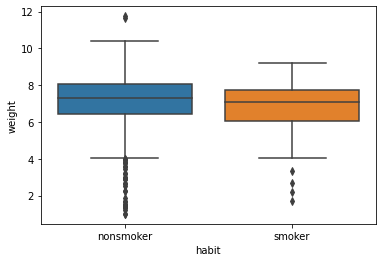

In [ ]:
sns.boxplot(x='habit', y='weight', data=df)

##  Question 2
#### Write the hypotheses for testing if the average weights of babies born to smoking and non-smoking mothers are different.

Null Hypothesis  :  μ1 = μ2    
Alternative Hypothesis:  μ1 ≠ μ2   

In [ ]:
#Here is the sample statistics
dx = df.groupby('habit').agg({'weight' : [np.mean, np.std, np.size]})
dx

weight                 
               mean       std   size
habit                               
nonsmoker  7.144273  1.518681  873.0
smoker     6.828730  1.386180  126.0

μ1−μ2= 0.316

In [ ]:
sm.stats.ztest(df.loc[df.habit=="smoker", "weight"].dropna(), df.loc[df.habit=="nonsmoker", "weight"].dropna(),alternative='two-sided')

(-2.2033962812961625, 0.02756683007480755)

Since the p-value  (0.0275) is lower than the standard confidence level 0.05, we can reject the Null hypothesis that the average weights of babies born to smoking and non-smoking mothers are equal, Note: i used `alternative="two-sided"` because we are testing for inequality in both sides

## **Question** **3**
#### Conduct a hypothesis test evaluating whether the average weight gained by younger mothers is different than the average weight gained by mature mothers.

**Null** **Hypothesis**  :  **μ1** = **μ2**    
**Alternative** **Hypothesis**:  **μ1 ≠** **μ2** 

In [ ]:
dx = df.groupby('mature').agg({'gained' : [np.mean, np.std, np.size]})
dx

gained                  
                  mean        std   size
mature                                  
mature mom   28.790698  13.482439  133.0
younger mom  30.560427  14.346910  867.0

μ1 - μ2 = 0.7698  


In [ ]:
sm.stats.ztest(df.loc[df.mature=="mature mom", "gained"].dropna(), df.loc[df.mature=="younger mom", "gained"].dropna(),alternative='two-sided')

(-1.3150120052394427, 0.18850586777828726)

Since the p-value (0.186) is greater than the standard confidence level 0.05, we can accept the Null hypothesis that the average weight gained by younger mothers is equal to the average weight gained by mature mothers.
Notice that we also used ```two-sided``` because we are testing for inequality in both side <>




   ## **Question**  **4** 
   ## Construct a confidence interval for the difference between the weights of babies born to smoking and non-smoking mothers.

#### **The** **summary** **statistics** 

In [ ]:
dx = df.groupby('habit').agg({'weight' : [np.mean, np.std, np.size]})
dx

weight                 
               mean       std   size
habit                               
nonsmoker  7.144273  1.518681  873.0
smoker     6.828730  1.386180  126.0

In [ ]:
#calculating the standard error of the mean for smoker, non smoker
sem_nonsmoker = 1.518681 / np.sqrt(873)
sem_smoker = 1.386180 / np.sqrt(126)
print(sem_nonsmoker, sem_smoker)

0.05139956431370965 0.12349072943805481


In [ ]:

sem_diff = np.sqrt(sem_nonsmoker**2 + sem_smoker**2)
sem_diff

0.1337605153577917

In [ ]:
#difference between the means
diff_mean = 7.144273 -6.828730
print(diff_mean)

0.3155429999999999


In [ ]:
#lower and upper confidence interval bounds calculations
lcb = diff_mean - 1.96 * sem_diff
ucb = diff_mean + 1.96 * sem_diff
print(lcb, ucb)

(0.05337238989872817, 0.5777136101012716)

Our answer above means that we are 95% confident that the difference between the average weight of the babies whose mother smoke or doesn't smoke is 
between 0.0533 to 0.5777 